### Using the same env which is described in Part I: Escape Room Game

In [85]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import gym
from gym import spaces


In [86]:
# Defining RL Env (Theme: Escape Room Game)
class EscapeRoomGame(gym.Env):
    def __init__(self):
        super(EscapeRoomGame, self).__init__()

        # Defining grid size and state space
        self.grid_size = 5
        self.exit_state = (4, 4)
        self.steps_taken = 0  # Initializing step counter
        self.state_space = []
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.state_space.append((i, j))

        # Defining action space (0: Up, 1: Right, 2: Down, 3: Left)
        self.action_space = spaces.Discrete(4)

        # states and rewards
        self.observations = spaces.Discrete(len(self.state_space))
        self.rewards = {
            "key": 20,
            "door": 10,
            "step_cost": -5,
            "trap": -15,
            "exit": 50
        }

        # Defining keys, doors, traps, and exit locations of the grid
        self.keys = [(1, 1), (3, 3)]
        self.doors = [(2, 2), (4, 2)]
        self.traps = [(0, 4), (3, 1)]
        self.start_state = (0, 0)
        self.has_key = False  # it is to track if the agent has collected a key
        self.current_state = self.start_state

        # Loading images for each element (to make it interactive)
        self.agent_img = mpimg.imread('agent.png')
        self.key_img = mpimg.imread('key.png')
        self.trap_img = mpimg.imread('trap.png')
        self.door_img = mpimg.imread('door.png')
        self.exit_img = mpimg.imread('exit.png')

    def step(self, action):
      self.steps_taken += 1

      # Current position
      x, y = self.current_state
      new_x, new_y = x, y

      # Checking if the action leads to a valid move within boundaries
      if action == 0 and x > 0:               # Up, only if not at top boundary
          new_x = x - 1
      elif action == 1 and y < self.grid_size - 1:  # Right, only if not at right boundary
          new_y = y + 1
      elif action == 2 and x < self.grid_size - 1:  # Down, only if not at bottom boundary
          new_x = x + 1
      elif action == 3 and y > 0:               # Left, only if not at left boundary
          new_y = y - 1

      # this keeps record whether the agent got thorugh exit or not
      goal_reached = False


      # Updating state and rewards

      # invalid moves (moves which are not allowed)

      if (new_x, new_y) == (x, y):  # If position has not changed, agent hit a boundary
          reward_points = 0  # No penalty or reward for invalid move
          status = "Boundary Hit"

      else:
          # Valid move
          self.current_state = (new_x, new_y)
          reward_points = self.rewards["step_cost"]
          status = "Moving"

          # Checking for rewards
          if self.current_state == self.exit_state:
              reward_points = self.rewards["exit"]
              status = "Reached Exit"
              goal_reached = True
          elif self.current_state in self.keys:
              reward_points = self.rewards["key"]
              self.has_key = True
              status = "Key Collected"
          elif self.current_state in self.traps:
              reward_points = self.rewards["trap"]
              status = "Hit Trap"
          elif self.current_state in self.doors and self.has_key:  #if agent has key then only open the door
              reward_points = self.rewards["door"]
              self.has_key = False
              status = "Unlocked Door"
          goal_reached = False

      # Returning state and rewards
      return self.current_state, reward_points, goal_reached, status, self.steps_taken


    def reset(self):
        self.current_state = self.start_state
        self.has_key = False
        return self.current_state

    def render(self, action=None, reward_points=None, status=""):
        # Creating the plot with extra space above the grid to print what's happening in the grid
        action_names = ["Up", "Right", "Down", "Left"]

        # formatting the text for better visualization
        bold_italic = "\033[1;3m"  # ANSCI escape codes for formatting the text
        txt_reset = "\033[0m"

        # Displaying the information above the grid which tell what action did the agent took and what happend
        print(f"📍{bold_italic} Current Agent Position:{txt_reset} {self.current_state}")

        if action is not None:
          print(f"➡️{bold_italic} Action Taken:{txt_reset} {action_names[action]}")

        if reward_points is not None:
          print(f"💰{bold_italic} Reward:{txt_reset} {reward_points}")

        print(f"📋{bold_italic} Status:{txt_reset} {status}")

        fig, axes = plt.subplots(figsize=(6, 6))

        # plot limits for the grid
        axes.set_xlim(0, self.grid_size)
        axes.set_ylim(0, self.grid_size)


        # Drawing each cell in the grid
        for x in range(self.grid_size):
            for y in range(self.grid_size):
                if (x, y) == self.current_state:
                    img = self.agent_img   # Agent
                elif (x, y) in self.keys:
                    img = self.key_img     # Key
                elif (x, y) in self.traps:
                    img = self.trap_img    # Trap
                elif (x, y) in self.doors:
                    img = self.door_img    # Door
                elif (x, y) == self.exit_state:
                    img = self.exit_img    # Exit
                else:
                    img = None

                if img is not None:
                    axes.imshow(img, extent=(y, y + 1, self.grid_size - x - 1, self.grid_size - x))
                else:
                    # Drawing an empty cell
                    axes.add_patch(patches.Rectangle((y, self.grid_size - x - 1), 1, 1, color="lightgrey"))

        # making grid border bold (using set_linewidth to increae thickness)
        for border in axes.spines.values():
          border.set_linewidth(1.5)
          border.set_edgecolor("black")

        # grid lines
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid()
        plt.show()

Starting Position: (0, 0)
Step: 1, Action: 1, New State: (0, 1), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 1)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


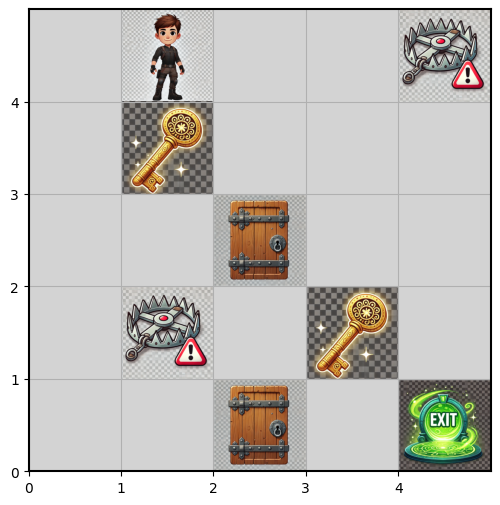

----------------------------------------------------------------------
Step: 2, Action: 0, New State: (0, 1), Reward: 0, Status: Boundary Hit

📍 Current Agent Position: (0, 1)
➡️ Action Taken: Up
💰 Reward: 0
📋 Status: Boundary Hit


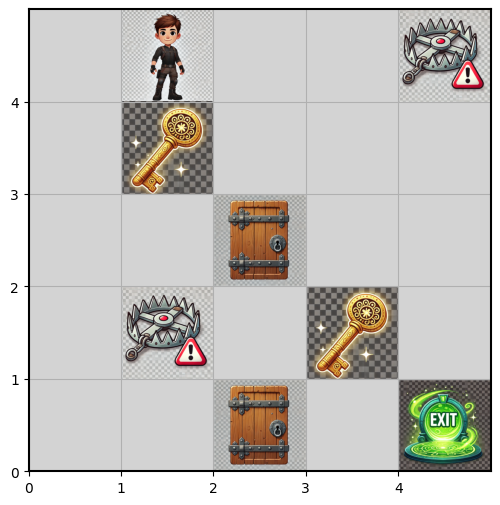

----------------------------------------------------------------------
Step: 3, Action: 2, New State: (1, 1), Reward: 20, Status: Key Collected

📍 Current Agent Position: (1, 1)
➡️ Action Taken: Down
💰 Reward: 20
📋 Status: Key Collected


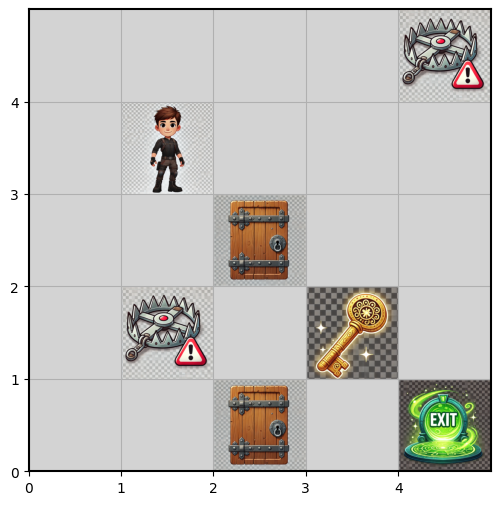

----------------------------------------------------------------------
Step: 4, Action: 0, New State: (0, 1), Reward: -5, Status: Moving

📍 Current Agent Position: (0, 1)
➡️ Action Taken: Up
💰 Reward: -5
📋 Status: Moving


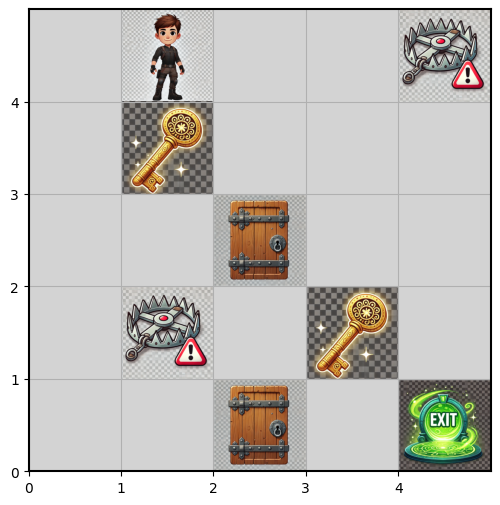

----------------------------------------------------------------------
Step: 5, Action: 2, New State: (1, 1), Reward: 20, Status: Key Collected

📍 Current Agent Position: (1, 1)
➡️ Action Taken: Down
💰 Reward: 20
📋 Status: Key Collected


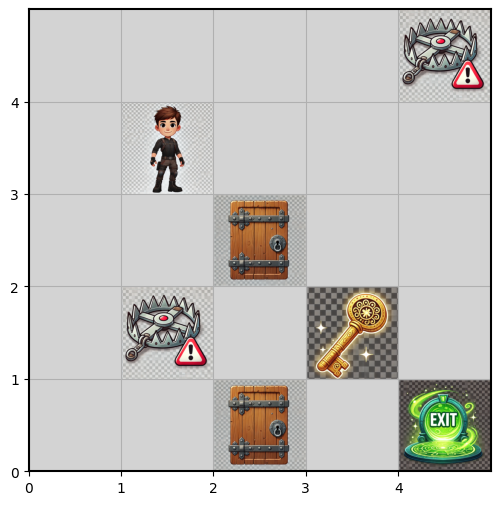

----------------------------------------------------------------------
Step: 6, Action: 1, New State: (1, 2), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 2)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


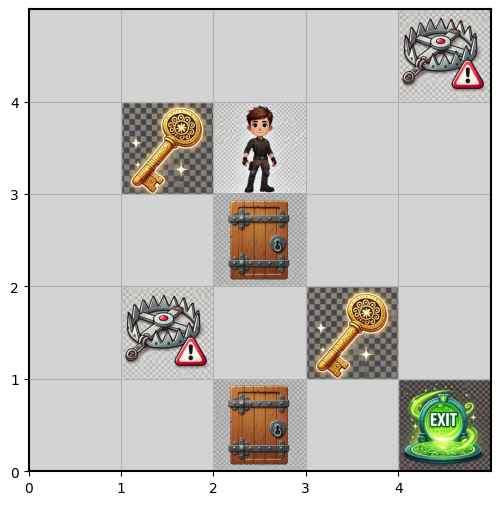

----------------------------------------------------------------------
Step: 7, Action: 1, New State: (1, 3), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 3)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


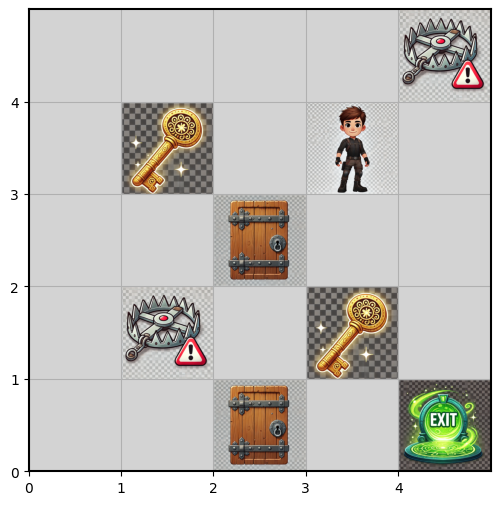

----------------------------------------------------------------------
Step: 8, Action: 1, New State: (1, 4), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 4)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


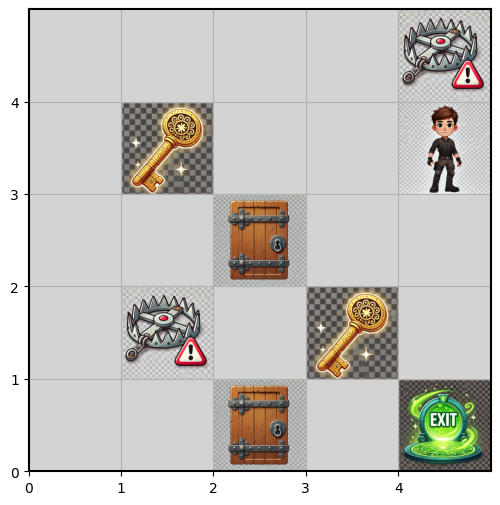

----------------------------------------------------------------------
Step: 9, Action: 3, New State: (1, 3), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 3)
➡️ Action Taken: Left
💰 Reward: -5
📋 Status: Moving


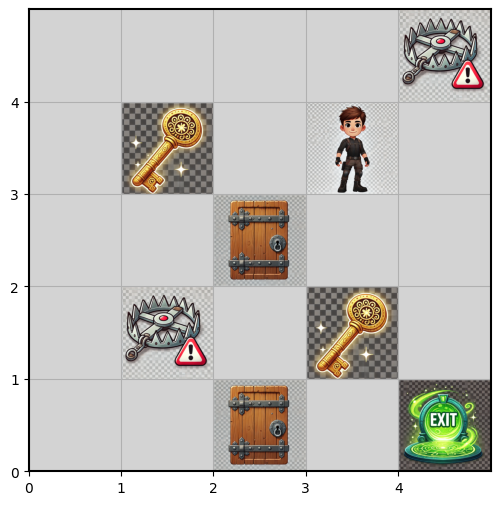

----------------------------------------------------------------------
Step: 10, Action: 1, New State: (1, 4), Reward: -5, Status: Moving

📍 Current Agent Position: (1, 4)
➡️ Action Taken: Right
💰 Reward: -5
📋 Status: Moving


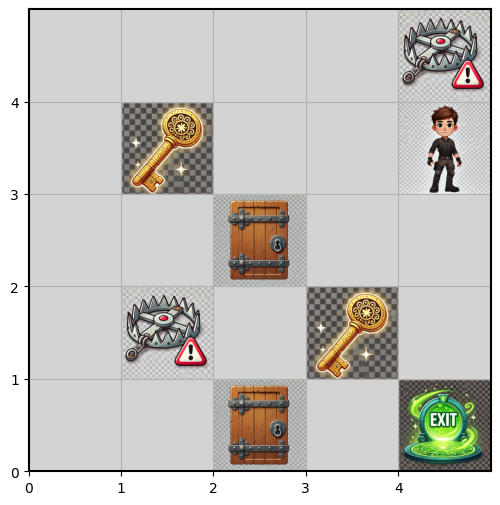

----------------------------------------------------------------------


In [87]:
# displaying the results for 10 random timesteps
my_env = EscapeRoomGame()
state = my_env.reset()
print("Starting Position:", my_env.current_state)

for i in range(10):
  action = my_env.action_space.sample()  # Random
  new_state, reward_points, goal_reached, status, steps_taken = my_env.step(action)

  #displaying the details
  print(f"Step: {steps_taken}, Action: {action}, New State: {new_state}, Reward: {reward_points}, Status: {status}\n")

  # rendering the current state
  my_env.render(action, reward_points , status)
  # using separator line to better clarify steps from one another
  print("-" * 70)

  # checking if game is over or not
  if goal_reached:
    print("Exit reached!")
    break


### SARSA Implementation to compare it with Double Q learning at the end of part 3

In [89]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# SARSA Parameters
alpha = 0.1           # Learning rate
epsilon = 1.0         # Initial exploration rate
epsilon_decay = 0.995 # Decay rate
gamma = 0.99          # Discount factor
min_epsilon = 0.01    # Minimum epsilon for exploration
num_episodes = 1000   # Number of episodes for training
max_timesteps = 300   # Maximum steps per episode

# Initializing Q-table as a dictionary (because of tuple-based states)
Q_table = {}
for state in my_env.state_space:
  action_values = {}
  for action in range(my_env.action_space.n):
    action_values[action] = 0.0

  Q_table[state] = action_values

# Making a copy of the initial Q-table for printing it later on
initial_Q_table = {state: actions.copy() for state, actions in Q_table.items()}

# Track the total reward per episode
rewards_per_episode = []

# tacking execution time
start_time = time.time()


# SARSA Algorithm (fixed starting position)
for episode in range(num_episodes):
    # starting environment from a fixed position         (can be started with random poistion each time which may improve Generalization)
    my_env.current_state = (0,0)
    state = my_env.current_state
    total_reward = 0

    # initial action using epsilon-greedy policy
    if random.uniform(0, 1) < epsilon:
        action = my_env.action_space.sample()  # Exploring: choose a random action
    else:
        action = max(Q_table[state], key=Q_table[state].get)  # Exploitting: choose the action with the highest Q-value

    goal_reached = False
    steps_taken = 0       #step counter for each episode

    while not goal_reached and steps_taken < max_timesteps:
        # Take the next action
        next_state, reward, goal_reached, status, _ = my_env.step(action)
        total_reward += reward
        steps_taken += 1             # Increment step counter

        #using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            next_action = my_env.action_space.sample()          #Exploring
        else:
            next_action = max(Q_table[next_state], key=Q_table[next_state].get)    #Exploitting

        # SARSA Q-value update
        # Q_table[state][action] += alpha * (reward + gamma * Q_table[next_state][next_action] - Q_table[state][action])
        # Calculating the current Q-value
        current_Q_value = Q_table[state][action]

        # Calculating target Q-value
        next_Q_value = Q_table[next_state][next_action]
        target_Q_value = reward + gamma * next_Q_value

        # Computing the Q-value update (SARSA formula)
        updated_Q_value = alpha * (target_Q_value - current_Q_value)

        # Update the Q-value for the current state-action pair
        Q_table[state][action] += updated_Q_value

        # Transition to the next state and action
        state = next_state
        action = next_action

    # Decay epsilon after each episode (reducing exploration over time)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Storing the total reward for episode
    rewards_per_episode.append(total_reward)

    # Printing progress every 100 episodes
    if episode % 100 == 0:
        print(f"Episode {episode} completed with total reward: {total_reward}, epsilon: {epsilon:.4f}")
        # printing some Q-values to monitor progress
        print(f"Sample Q-value for state (0, 0) and action 0: {Q_table[(0, 0)][0]}")

# execution end time
end_time = time.time()
#storing this to plot after part 3
rewards_per_episode_sarsa = rewards_per_episode
print(f"Training complete with Execution time: {end_time - start_time:.2f} seconds")

Episode 0 completed with total reward: -370, epsilon: 0.9950
Sample Q-value for state (0, 0) and action 0: -0.10384609950000001
Episode 100 completed with total reward: 3015, epsilon: 0.6027
Sample Q-value for state (0, 0) and action 0: 5.151922665060045
Episode 200 completed with total reward: 4250, epsilon: 0.3651
Sample Q-value for state (0, 0) and action 0: 65.40938493724586
Episode 300 completed with total reward: 5605, epsilon: 0.2212
Sample Q-value for state (0, 0) and action 0: 206.85091212782166
Episode 400 completed with total reward: 5830, epsilon: 0.1340
Sample Q-value for state (0, 0) and action 0: 461.19826193685776
Episode 500 completed with total reward: 6290, epsilon: 0.0812
Sample Q-value for state (0, 0) and action 0: 461.19826193685776
Episode 600 completed with total reward: 6070, epsilon: 0.0492
Sample Q-value for state (0, 0) and action 0: 651.1778628275414
Episode 700 completed with total reward: 6415, epsilon: 0.0298
Sample Q-value for state (0, 0) and action 0

### Part III: Implement N-step Double Q-learning

#### Step 1: Derive the n-step Double Q-Learning update rule
**We derived n-step Double Q - Leasrning update rule in the report**

### Step 2: Modify your SARSA implementation to incorporate the n-step Double Q - learning update rule.


Episode 0 completed with total reward: -405, epsilon: 0.9950
Episode 100 completed with total reward: 2585, epsilon: 0.6027
Episode 200 completed with total reward: 4225, epsilon: 0.3651
Episode 300 completed with total reward: 5415, epsilon: 0.2212
Episode 400 completed with total reward: 5850, epsilon: 0.1340
Episode 500 completed with total reward: 6015, epsilon: 0.0812
Episode 600 completed with total reward: 6410, epsilon: 0.0492
Episode 700 completed with total reward: 6555, epsilon: 0.0298
Episode 800 completed with total reward: 6675, epsilon: 0.0180
Episode 900 completed with total reward: 6680, epsilon: 0.0109
 N-step Double Q-learning training complete. Execution time: 2.97 seconds


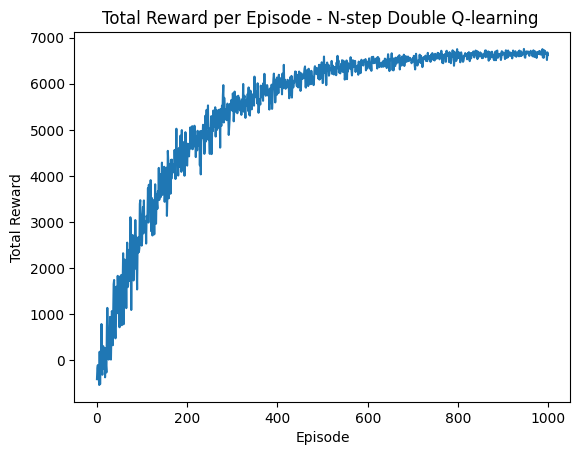

In [101]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from collections import deque

# parameters of N-step Double Q-learning

alpha = 0.1           # learning rate
gamma = 0.99          # discount factor
epsilon = 1.0         # initial exploration rate
epsilon_decay = 0.995 # decay rate for epsilon
min_epsilon = 0.01    # minimum epsilon for exploration
num_episodes = 1000   # number of episodes for training
max_timesteps = 300  # maximum steps per episode for thorough exploration
n = 3                 # number of steps for N-step backup

# intitializing 2 Q-tables for Double Q-learning

q_table_a = {}

q_table_b = {}

for state in my_env.state_space:
    q_table_a[state] = {action: 0.0 for action in range(my_env.action_space.n)}
    q_table_b[state] = {action: 0.0 for action in range(my_env.action_space.n)}

# making  a copy of the initial Q-tables to print later

initial_q_table_a = {state: actions.copy() for state, actions in q_table_a.items()}

initial_q_table_b = {state: actions.copy() for state, actions in q_table_b.items()}


# tracking the total reward per episode
rewards_per_episode = []

start_time = time.time()

 # N-step Double Q-learning Algorithm
for episode in range(num_episodes):

    # reseting the environment to a random starting position
    my_env.current_state = random.choice(my_env.state_space)
    state = my_env.current_state

    total_reward = 0

    # initializing action using epsilon-greedy policy
    if random.uniform(0, 1) < epsilon:

        action = my_env.action_space.sample()  # exploring
    else:
        action = max(q_table_a[state], key=q_table_a[state].get)  # exploiting using Q_A

    # initializing trajectory storage

    trajectory = deque(maxlen=n)  # to store (state, action, reward) tuples

    goal_reached = False

    steps_taken = 0  # initializing step counter for each episode

    while not goal_reached and steps_taken < max_timesteps:

        # taking the chosen action and observing the next state and reward

        next_state, reward, goal_reached, status, _ = my_env.step(action)

        total_reward += reward

        steps_taken += 1  # incrementing step counter

        # storing state, action, reward in trajectory

        trajectory.append((state, action, reward))

        # choosing the next action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            next_action = my_env.action_space.sample()  # exploring
        else:

            next_action = max(q_table_a[next_state], key=q_table_a[next_state].get)  # exploiting using Q_A

        # performing  N-step update if trajectory is full or episode ends

        if len(trajectory) == n or goal_reached:

            # Computing G_t^{(n)} (N-step return)
            g_t = sum(gamma**i * trajectory[i][2] for i in range(len(trajectory)))  # Sum of rewards
            if not goal_reached:

                # bootstrapping from Q_B using argmax from Q_A

                g_t += gamma**n * q_table_b[next_state][max(q_table_a[next_state], key=q_table_a[next_state].get)]

            # updating Q_A or Q_B alternately
            update_state, update_action, _ = trajectory[0]

            if episode % 2 == 0:  # alternate updates
                q_table_a[update_state][update_action] += alpha * (g_t - q_table_a[update_state][update_action])
            else:
                q_table_b[update_state][update_action] += alpha * (g_t - q_table_b[update_state][update_action])

        # transitioning to the next state and action

        state = next_state
        action = next_action

    # decaying epsilon after each episode to reduce exploration over time
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # storing the total reward for this episode
    rewards_per_episode.append(total_reward)

    # logging progress every 100 episodes
    if episode % 100 == 0:
        print(f"Episode {episode} completed with total reward: {total_reward}, epsilon: {epsilon:.4f}")


end_time = time.time()

#storing this to plot after part 3
rewards_per_episode_double_q = rewards_per_episode

print(f" N-step Double Q-learning training complete. Execution time: {end_time - start_time:.2f} seconds")

# Plotting the total reward per episode
plt.plot(range(num_episodes), rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode - N-step Double Q-learning ")
plt.show()


### Step 3: Hyperparameter Tuning

Hyperparameter tuning completed in 170.65 seconds
Best Parameters: Gamma=0.99, Epsilon Decay=0.98, Min Epsilon=0.01, Num Episodes=1000, Max Timesteps=600
Best Average Reward: 13348.10


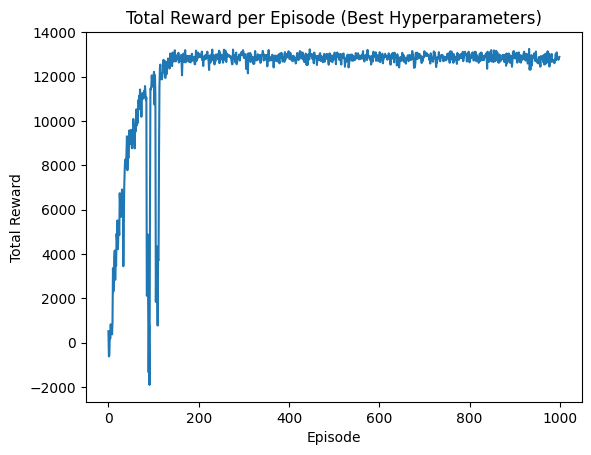

In [102]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
import time

# setting random seed for reproducibility

SEED = 42
random.seed(SEED)

np.random.seed(SEED)

# hyperparameter ranges for tuning
gamma_values = [0.9, 0.95, 0.99]
epsilon_decay_values = [0.99, 0.995, 0.98]
min_epsilon_values = [0.01, 0.05]
num_episodes_values = [500, 1000]
max_timesteps_values = [200, 600]

# fixed parameters
alpha = 0.1  # learning rate
n = 3        # number of steps for N-step backup

# storing results
tuning_results = {}

# starting hyperparameter tuning
start_time = time.time()
for gamma in gamma_values:

    for epsilon_decay in epsilon_decay_values:
        for min_epsilon in min_epsilon_values:
            for num_episodes in num_episodes_values:

                for max_timesteps in max_timesteps_values:
                    # initializing Q-tables for Double Q-learning
                    q_table_a = {}
                    q_table_b = {}
                    for state in my_env.state_space:

                        q_table_a[state] = {action: 0.0 for action in range(my_env.action_space.n)}
                        q_table_b[state] = {action: 0.0 for action in range(my_env.action_space.n)}

                    # tracking total rewards per episode
                    rewards_per_episode = []

                    # initializing epsilon
                    epsilon = 1.0

                    # training loop
                    for episode in range(num_episodes):

                        # resetting the environment to a random starting position
                        my_env.current_state = random.choice(my_env.state_space)  # randomly choose a starting state
                        state = my_env.current_state

                        total_reward = 0

                        # initializing action using epsilon-greedy policy
                        if random.uniform(0, 1) < epsilon:

                            action = my_env.action_space.sample()  # exploring
                        else:

                            action = max(q_table_a[state], key=q_table_a[state].get)  # exploiting using Q_A

                        # initializing trajectory storage
                        trajectory = deque(maxlen=n)

                        done = False

                        steps_taken = 0

                        while not done and steps_taken < max_timesteps:

                            # taking action, observing next state and reward
                            next_state, reward, done, status, _ = my_env.step(action)

                            total_reward += reward
                            steps_taken += 1

                            # storing state, action, reward  in trajectory
                            trajectory.append((state, action, reward))

                            # choosing next action using epsilon-greedy policy
                            if random.uniform(0, 1) < epsilon:

                                next_action = my_env.action_space.sample()  # exploring
                            else:

                                next_action = max(q_table_a[next_state], key=q_table_a[next_state].get)

                            # performing N-step update if trajectory is full or episode ends
                            if len(trajectory) == n or done:

                                # Compute G_t^{(n)} (N-step return)
                                g_t = sum(gamma**i * trajectory[i][2] for i in range(len(trajectory)))
                                if not done:

                                    g_t += gamma**n * q_table_b[next_state][
                                        max(q_table_a[next_state], key=q_table_a[next_state].get)
                                    ]

                                # updating Q_A or Q_B alternately
                                update_state, update_action, _ = trajectory[0]

                                if episode % 2 == 0:

                                    q_table_a[update_state][update_action] += alpha * (
                                        g_t - q_table_a[update_state][update_action]
                                    )

                                else:

                                    q_table_b[update_state][update_action] += alpha * (
                                        g_t - q_table_b[update_state][update_action]
                                    )

                            # transitioning to next state and action
                            state = next_state
                            action = next_action

                        # decaying epsilon after each episode
                        epsilon = max(min_epsilon, epsilon * epsilon_decay)

                        # tracking total rewards for the episode
                        rewards_per_episode.append(total_reward)

                    # storing the results for this combination of parameters
                    tuning_results[(gamma, epsilon_decay, min_epsilon, num_episodes, max_timesteps)] = np.mean(
                        rewards_per_episode[-100:]
                    )


end_time = time.time()
print(f"Hyperparameter tuning completed in {end_time - start_time:.2f} seconds")

# best hyperparameter combination
best_params = max(tuning_results, key=tuning_results.get)

print(f"Best Parameters: Gamma={best_params[0]}, Epsilon Decay={best_params[1]}, "
      f"Min Epsilon={best_params[2]}, Num Episodes={best_params[3]}, Max Timesteps={best_params[4]}")

print(f"Best Average Reward: {tuning_results[best_params]:.2f}")

# plotting the results for the best hyperparameter combination
plt.plot(range(num_episodes), rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode (Best Hyperparameters)")
plt.show()


### Best Model Set up:

Episode 0 completed with total reward: 45, epsilon: 0.9702
Episode 100 completed with total reward: 11760, epsilon: 0.1287
Episode 200 completed with total reward: 13375, epsilon: 0.0171
Episode 300 completed with total reward: 13500, epsilon: 0.0100
Episode 400 completed with total reward: 13370, epsilon: 0.0100
Episode 500 completed with total reward: 13420, epsilon: 0.0100
Episode 600 completed with total reward: 13315, epsilon: 0.0100
Episode 700 completed with total reward: 13380, epsilon: 0.0100
Episode 800 completed with total reward: 13435, epsilon: 0.0100
Episode 900 completed with total reward: 13475, epsilon: 0.0100
N-step Double Q-learning training complete. Execution time: 4.94 seconds


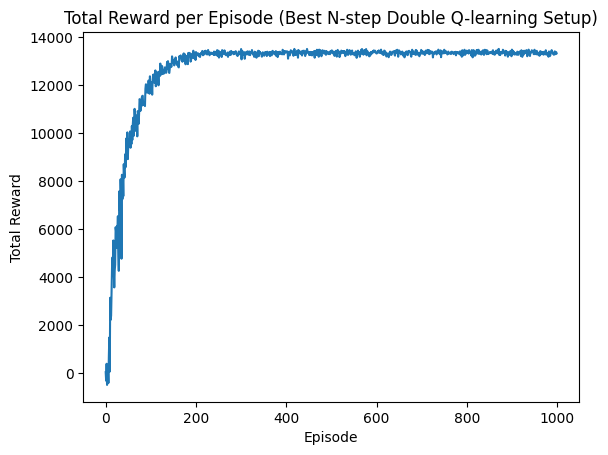

In [103]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from collections import deque

# Best Hyperparameters
alpha = 0.1           # Learning rate
gamma = 0.99           # Discount factor
epsilon = 0.99         # Initial exploration rate
epsilon_decay = 0.98  # Decay rate for epsilon
min_epsilon = 0.01    # Minimum epsilon for exploration
num_episodes = 1000   # Number of episodes for training
max_timesteps = 600  # Maximum steps per episode
n = 3                 # N-step backup

# initializing two Q-tables for Double Q-learning
q_table_a = {}
q_table_b = {}
for state in my_env.state_space:

    q_table_a[state] = {action: 0.0 for action in range(my_env.action_space.n)}

    q_table_b[state] = {action: 0.0 for action in range(my_env.action_space.n)}


# making a copy of the initial Q-tables to print later
initial_q_table_a = {state: actions.copy() for state, actions in q_table_a.items()}

initial_q_table_b = {state: actions.copy() for state, actions in q_table_b.items()}

# tracking the total reward per episode

rewards_per_episode = []


start_time = time.time()

# N-step Double Q-learning Algorithm
for episode in range(num_episodes):
    # resetting the environment to a random starting position
    my_env.current_state = random.choice(my_env.state_space)  #  choose a starting state randomly
    state = my_env.current_state
    total_reward = 0

    # initializing action using epsilon-greedy policy
    if random.uniform(0, 1) < epsilon:

        action = my_env.action_space.sample()  # exploring
    else:

        action = max(q_table_a[state], key=q_table_a[state].get)  # exploiting using Q_A

    # initializing trajectory storage
    trajectory = deque(maxlen=n)  # To store (state, action, reward) tuples

    goal_reached = False
    steps_taken = 0  # initializing step counter for each episode

    while not goal_reached and steps_taken < max_timesteps:
        # taking the chosen action, observe the next state and reward
        next_state, reward, goal_reached, status, _ = my_env.step(action)
        total_reward += reward
        steps_taken += 1  # incrementing step counter

        # storing state, action, reward in trajectory
        trajectory.append((state, action, reward))

        # choosing the next action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:

            next_action = my_env.action_space.sample()  # exploring
        else:

            next_action = max(q_table_a[next_state], key=q_table_a[next_state].get)  # exploiting using Q_A

        # performing N-step update if trajectory is full or episode ends
        if len(trajectory) == n or goal_reached:

            # Compute G_t^{(n)} (N-step return)

            g_t = sum(gamma**i * trajectory[i][2] for i in range(len(trajectory)))  # Sum of rewards

            if not goal_reached:

                # bootstrapping from Q_B using argmax from Q_A
                g_t += gamma**n * q_table_b[next_state][max(q_table_a[next_state], key=q_table_a[next_state].get)]

            # updating Q_A or Q_B alternately
            update_state, update_action, _ = trajectory[0]
            if episode % 2 == 0:  # alternate updates
                q_table_a[update_state][update_action] += alpha * (g_t - q_table_a[update_state][update_action])
            else:
                q_table_b[update_state][update_action] += alpha * (g_t - q_table_b[update_state][update_action])

        # transitioning to the next state and action

        state = next_state

        action = next_action

    # Decay epsilon after each episode to reduce exploration over time
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # storing the total reward for this episode

    rewards_per_episode.append(total_reward)

    # progress every 100 episodes
    if episode % 100 == 0:
        print(f"Episode {episode} completed with total reward: {total_reward}, epsilon: {epsilon:.4f}")

end_time = time.time()

print(f"N-step Double Q-learning training complete. Execution time: {end_time - start_time:.2f} seconds")

# Plotting the total reward per episode
plt.plot(range(num_episodes), rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode (Best N-step Double Q-learning Setup)")
plt.show()


In [104]:

print("\nTrained Q-Table A:")
for state, actions in q_table_a.items():
    print(f"State {state}: {actions}")

print("\nTrained Q-Table B:")
for state, actions in q_table_b.items():
    print(f"State {state}: {actions}")



Trained Q-Table A:
State (0, 0): {0: 27.487812951778817, 1: 2014.8443004028757, 2: 38.79516856209587, 3: 54.39475944479539}
State (0, 1): {0: 298.64623961709833, 1: 31.4117295880866, 2: 2142.3957492663494, 3: 41.819147869764244}
State (0, 2): {0: 143.59665760399355, 1: 111.93595100721507, 2: 1989.7498736225289, 3: 42.33192092556858}
State (0, 3): {0: 288.9823013051025, 1: 243.30000250208093, 2: 2081.667182190782, 3: 188.0438827833766}
State (0, 4): {0: 100.84125545759159, 1: 106.27435917856732, 2: 102.81727430878341, 3: 1753.120722179791}
State (1, 0): {0: 26.92392267684146, 1: 1903.5615945593981, 2: 74.82608631367773, 3: 79.09523051310585}
State (1, 1): {0: 95.45252490942019, 1: 2153.776383860492, 2: 145.04947182889958, 3: 67.2133895285817}
State (1, 2): {0: 480.77308106464045, 1: 651.5638949241538, 2: 2178.7756883079614, 3: 558.9552418225068}
State (1, 3): {0: 244.20771322302446, 1: 760.3866849191944, 2: 2184.765429140446, 3: 384.3354617445366}
State (1, 4): {0: 407.720408341188, 1:

### Step 4: Results with different values of n

In [121]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
import time


# Best Hyperparameters
alpha = 0.1           # Learning rate
gamma = 0.99           # Discount factor
epsilon = 0.99         # Initial exploration rate
epsilon_decay = 0.98  # Decay rate for epsilon
min_epsilon = 0.01    # Minimum epsilon
num_episodes = 1000   # Number of episodes
max_timesteps = 600  # Maximum steps per episode
n_values = [1, 2, 3, 4, 5]  # N-step values

# storing results for analysis
results = {}

for n in n_values:


    print(f"\nTraining with n = {n}...\n")

    # initializing Q-tables
    q_table_a = {}
    q_table_b = {}
    for state in my_env.state_space:
        q_table_a[state] = {action: 0.0 for action in range(my_env.action_space.n)}
        q_table_b[state] = {action: 0.0 for action in range(my_env.action_space.n)}


    # tracking rewards and epsilon values
    rewards_per_episode = []

    epsilon_values = []

    epsilon = 0.99  # resetting epsilon for each n

    # training loop
    for episode in range(num_episodes):

        my_env.current_state = random.choice(my_env.state_space)  # random starting state
        state = my_env.current_state
        total_reward = 0
        trajectory = deque(maxlen=n)  # storing state, action, reward tuples
        goal_reached = False
        steps_taken = 0

        # initializing action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:

            action = my_env.action_space.sample()  # exploring
        else:

            action = max(q_table_a[state], key=q_table_a[state].get)  # exploiting using Q_A

        while not goal_reached and steps_taken < max_timesteps:

            next_state, reward, goal_reached, status, _ = my_env.step(action)

            total_reward += reward

            steps_taken += 1
            trajectory.append((state, action, reward))

            # choosing next action using epsilon-greedy policy

            if random.uniform(0, 1) < epsilon:

                next_action = my_env.action_space.sample()  # exploring
            else:
                next_action = max(q_table_a[next_state], key=q_table_a[next_state].get)

            # performing N-step update if trajectory is full or episode ends
            if len(trajectory) == n or goal_reached:

                g_t = sum(gamma**i * trajectory[i][2] for i in range(len(trajectory)))
                if not goal_reached:

                    g_t += gamma**n * q_table_b[next_state][
                        max(q_table_a[next_state], key=q_table_a[next_state].get)
                    ]

                update_state, update_action, _ = trajectory[0]

                if episode % 2 == 0:

                    q_table_a[update_state][update_action] += alpha * (
                        g_t - q_table_a[update_state][update_action])
                else:

                    q_table_b[update_state][update_action] += alpha * (
                        g_t - q_table_b[update_state][update_action])

            state = next_state
            action = next_action

        # decaying epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        epsilon_values.append(epsilon)
        rewards_per_episode.append(total_reward)

    # storing results for this n
    results[n] = {
        "trained_q_table_a": q_table_a,
        "trained_q_table_b": q_table_b,
        "rewards_per_episode": rewards_per_episode,
        "epsilon_values": epsilon_values
    }

    print(f"Training complete for n = {n}\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Training with n = 1...

Training complete for n = 1


Training with n = 2...

Training complete for n = 2


Training with n = 3...

Training complete for n = 3


Training with n = 4...

Training complete for n = 4


Training with n = 5...

Training complete for n = 5



### Print the initial and trained Q-tables for each value of n.

In [122]:
# printing the initial and trained Q-tables for each value of n
for n, data in results.items():
    print(f"\n--- Q-Tables for n = {n} ---\n")

    # printing the initial Q-table  - before training
    print(f"Initial Q-table for Q_A (n = {n}):")
    for state, actions in q_table_a.items():
        print(f"State {state}: {actions}")
        break  # Only printing a sample to avoid overwhelming output

    print(f"\nInitial Q-table for Q_B (n = {n}):")
    for state, actions in q_table_b.items():
        print(f"State {state}: {actions}")
        break

    # Print the trained Q-tables
    print(f"\nTrained Q-table for Q_A (n = {n}):")
    for state, actions in data["trained_q_table_a"].items():
        print(f"State {state}: {actions}")
        break  # Only printing a sample to avoid overwhelming output

    print(f"\nTrained Q-table for Q_B (n = {n}):")
    for state, actions in data["trained_q_table_b"].items():
        print(f"State {state}: {actions}")
        break


    print("\n--- End of Q-Tables ---\n")




--- Q-Tables for n = 1 ---

Initial Q-table for Q_A (n = 1):
State (0, 0): {0: 17.409303855840193, 1: 894.1387295331319, 2: 78.8364265889139, 3: 112.67430438207731}

Initial Q-table for Q_B (n = 1):
State (0, 0): {0: 144.12978268421597, 1: 839.8478710305733, 2: 49.81614803406259, 3: 123.08111531389187}

Trained Q-table for Q_A (n = 1):
State (0, 0): {0: 31.959988790028262, 1: 741.7732307251163, 2: 40.859664317782524, 3: 55.497211816458844}

Trained Q-table for Q_B (n = 1):
State (0, 0): {0: 18.461351842693468, 1: 669.6326282701262, 2: 126.13326697162911, 3: 29.910563278866427}

--- End of Q-Tables ---


--- Q-Tables for n = 2 ---

Initial Q-table for Q_A (n = 2):
State (0, 0): {0: 17.409303855840193, 1: 894.1387295331319, 2: 78.8364265889139, 3: 112.67430438207731}

Initial Q-table for Q_B (n = 2):
State (0, 0): {0: 144.12978268421597, 1: 839.8478710305733, 2: 49.81614803406259, 3: 123.08111531389187}

Trained Q-table for Q_A (n = 2):
State (0, 0): {0: 33.267784560234354, 1: 709.29543

### Plot the total reward per episode for each value of n.




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


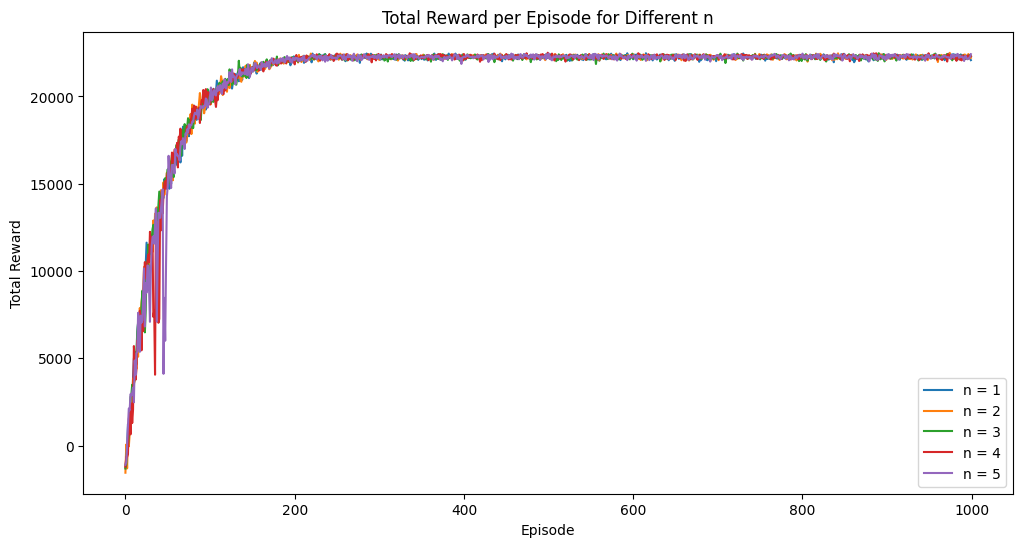

In [120]:
# plotting the Total Rewards per Episode
plt.figure(figsize=(12, 6))
for n in n_values:
    plt.plot(results[n]["rewards_per_episode"], label=f"n = {n}")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode for Different n")
plt.legend()
plt.show()

### Plot the epsilon decay graph for each value of n

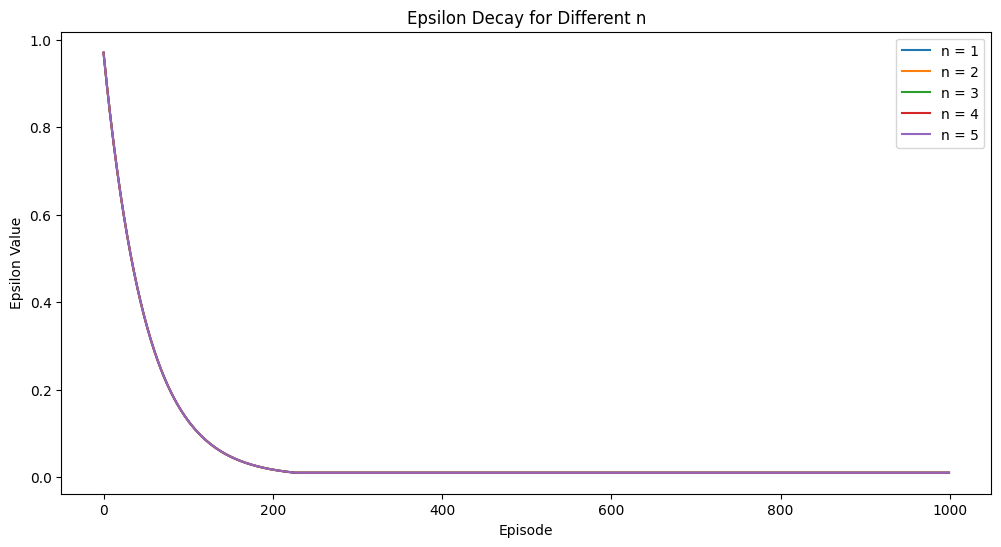

In [124]:
# plotting Epsilon Decay
plt.figure(figsize=(12, 6))
for n in n_values:
    plt.plot(results[n]["epsilon_values"], label=f"n = {n}")
plt.xlabel("Episode")
plt.ylabel("Epsilon Value")
plt.title("Epsilon Decay for Different n")
plt.legend()
plt.show()

### Run the environment for at least 10 episodes using only greedy actions for each value of n. Plot the total reward per episode.


Greedy Evaluation for n = 1...



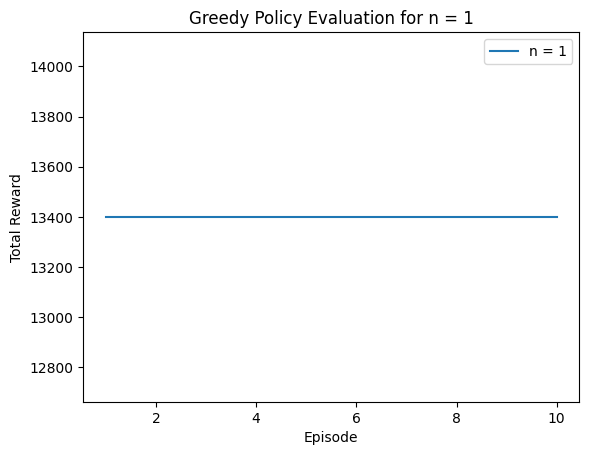


Greedy Evaluation for n = 2...



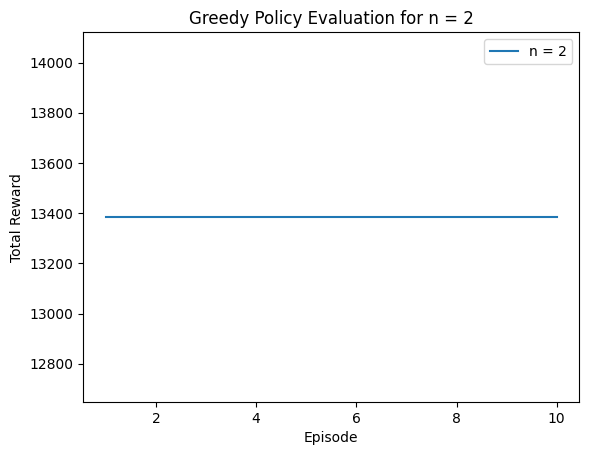


Greedy Evaluation for n = 3...



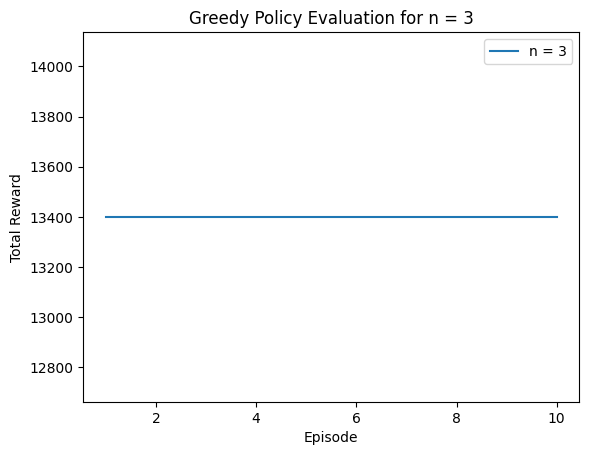


Greedy Evaluation for n = 4...



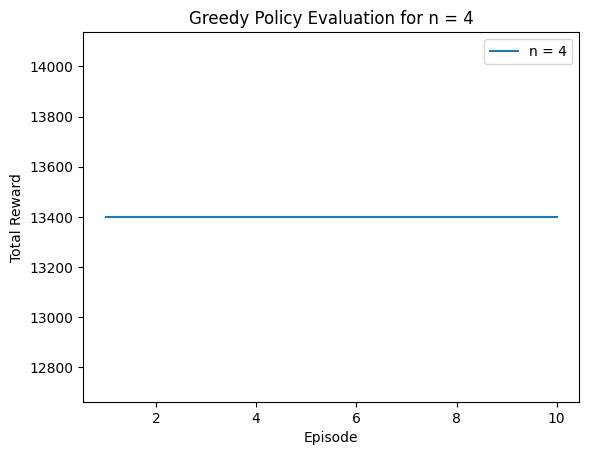


Greedy Evaluation for n = 5...



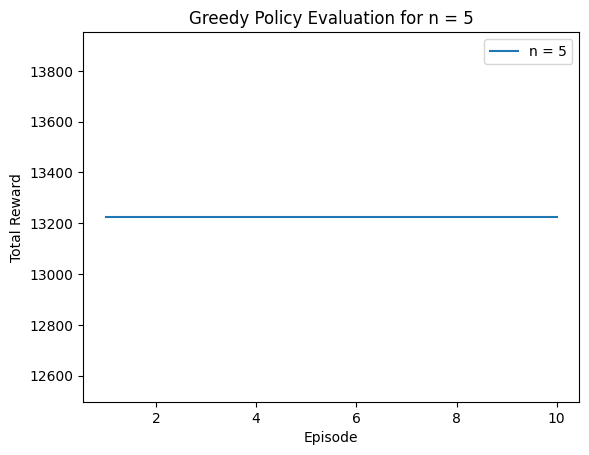


Greedy Evaluation for n = 6...



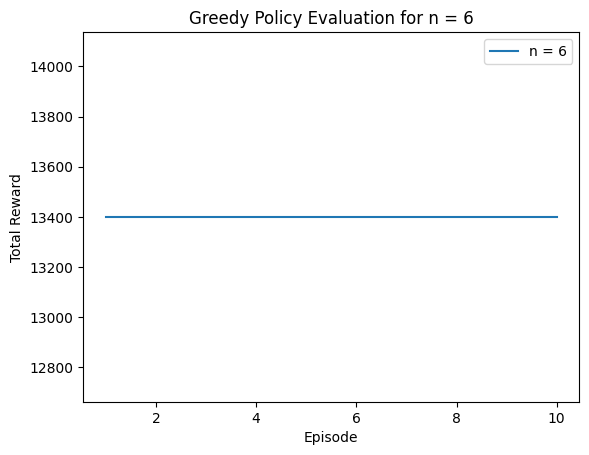

In [ ]:
# Greedy Evaluation
for n in n_values:

    print(f"\nGreedy Evaluation for n = {n}...\n")
    greedy_rewards = []

    for episode in range(10):

        my_env.current_state =(0,0) 

        state = my_env.current_state
        total_reward = 0
        done = False
        steps_taken = 0

        while not done and steps_taken < max_timesteps:

            action = max(results[n]["trained_q_table_a"][state], key=results[n]["trained_q_table_a"][state].get)

            next_state, reward, done, status, _ = my_env.step(action)
            total_reward += reward
            state = next_state
            steps_taken += 1

        greedy_rewards.append(total_reward)

    # plotting greedy rewards
    plt.plot(range(1, 11), greedy_rewards, label=f"n = {n}")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title(f"Greedy Policy Evaluation for n = {n}")
    plt.legend()
    plt.show()

# Plotting Reward per Episode of Sarsa vs Reward per Episode Double Q

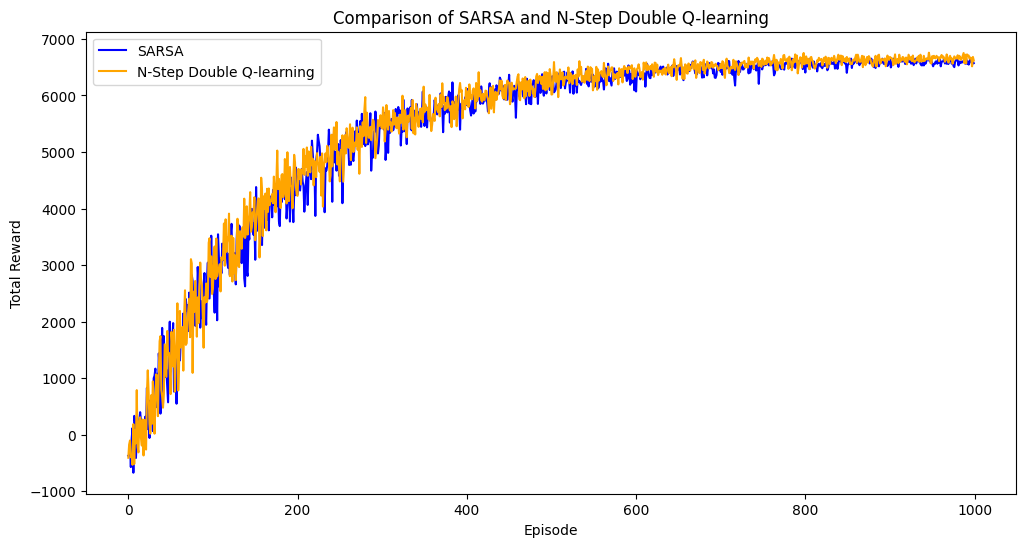

In [ ]:
import matplotlib.pyplot as plt


# Plotting both reward dynamics
plt.figure(figsize=(12, 6))
plt.plot(range(len(rewards_per_episode_sarsa)), rewards_per_episode_sarsa, label="SARSA", color='blue')
plt.plot(range(len(rewards_per_episode_double_q)), rewards_per_episode_double_q, label="N-Step Double Q-learning", color='orange')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Comparison of SARSA and N-Step Double Q-learning")
plt.legend()
plt.show()


### References

1. [Sutton, R. S., & Barto, A. G. (2020). Reinforcement Learning: An Introduction](http://incompleteideas.net/book/RLbook2020.pdf)  
2. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
3.  [Reinforcement Learning Introduction](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html)
4. [Target for Double Q learning](https://ai.stackexchange.com/questions/23026/how-to-compute-the-target-for-double-q-learning-update-step)  
5. [Python Random Module Documentation](https://docs.python.org/3/library/random.html)  



